In [2]:
import sys
sys.path.append('../resources/')

from get_data import stations

import pandas as pd
import numpy as np


def get_time_series_for_window(start_date, end_date, station, dataframe):
    return dataframe.loc[start_date:end_date, [station]]


def check_nan_values(dataframe):
    return dataframe.isnull().values.any()


def get_valid_sequences(df):
    valid_sequences = []
    starting_idx = 0

    for i, (_, row) in enumerate(df.iterrows()):
        flow = row[0]

        if np.isnan(flow):

            if starting_idx < i-1:
                valid_sequences.append((starting_idx, i))
                starting_idx = i+1
            else:
                starting_idx = i+1
                continue
    return valid_sequences


def valid_seqs_minimum_len(valid_seqs, seq_len):
    
    valid_seqs_min_len = []
    pops = []
    for i, (start, end) in enumerate(valid_seqs):
        if end - start >= seq_len:
            valid_seqs_min_len.append((start, end))

    return valid_seqs_min_len

In [3]:
interested_stations = ['13180000', '13300000', '13405000', '13410000', '13450000', '13470000', '13550000', '13600002', 
'13650000', '13710001', '13740000', '13750000', '13870000', '13880000', '13885000', '13886000']

df, nodata = stations(interested_stations, '3')

100%|██████████████████████████████████████████████████████████████████████████████████| 16/16 [00:36<00:00,  2.31s/it]


In [4]:
df1 = get_time_series_for_window('2000-01-01', '2015-12-31', '13450000', df)
valid_sequences = get_valid_sequences(df1)

val_seq = valid_seqs_minimum_len(valid_sequences, 31)

In [5]:
start, end = val_seq[1]
np.squeeze(np.array(df1.iloc[start:end, :]))

array([107.16  , 126.767 , 135.642 ,  93.6859,  73.7563,  56.0816,
        57.4118,  70.0399, 197.75  , 120.533 , 160.141 , 256.344 ,
       135.141 , 106.712 , 388.098 , 606.403 , 423.299 , 206.205 ,
       399.672 , 264.512 ,  65.6996, 152.643 , 135.141 ,  97.0816,
        88.6989,  76.0295,  69.3074,  60.8012,  56.7449,  99.6657,
        85.4456,  64.9889,  70.7759,  64.9889,  74.5104, 108.509 ,
        49.0285,  17.3798,  14.4554,  11.7855,   6.972 ,  65.6996,
        97.0816,  44.7728,  31.5709,  14.8071,   7.998 ,  25.3297,
       140.185 , 441.437 , 674.965 , 184.8   , 167.807 , 166.701 ,
       254.995 , 477.879 , 173.385 , 118.644 ,  87.8802, 130.184 ,
       159.059 , 197.75  , 209.265 , 179.05  , 256.344 , 334.928 ,
       418.182 , 481.507 , 401.338 , 195.365 ,  81.4595, 203.772 ,
       147.392 ,  84.6412,  22.6678, 672.837 , 338.768 , 241.684 ,
       655.924 , 373.452 , 328.067 , 931.952 , 706.18  , 463.496 ,
       380.742 , 149.482 , 140.185 , 163.405 , 354.337 , 142.2

In [6]:
from matplotlib import pyplot 

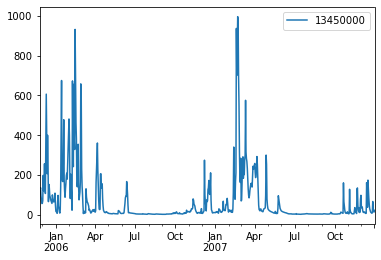

In [7]:
df1.iloc[start:end, :].plot()

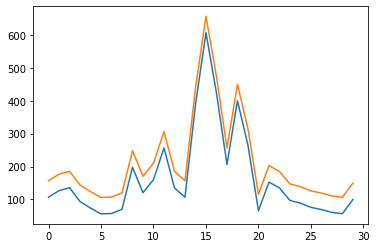

In [14]:
import matplotlib.pyplot as plt
plt.plot(np.squeeze(np.array(df1.iloc[start:start+30, :])))
plt.plot(np.squeeze(np.array(df1.iloc[start:start+30, :])+50))

In [15]:
val_seq

[(0, 2122),
 (2155, 2922),
 (3274, 3353),
 (3487, 3528),
 (3774, 4429),
 (4432, 4837),
 (4930, 5074),
 (5285, 5510)]